In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [130]:
products = pd.read_csv('./data/products_clean.csv')

In [131]:
products.head()

,name,brand,category,price,ingredients,no_reviews,hearts,size1,size2,url,final_size,price_per_ounce
0,Protini™ Polypeptide Moisturizer,Drunk Elephant,moisturizing-cream-oils-mists,68.0,"Dicaprylyl Carbonate, Glycerin, Cetearyl Alcoh...",3000,216935,1.69,0.0,https://www.sephora.com/product/protini-tm-pol...,1.69,40.236686
1,The Water Cream,Tatcha,moisturizing-cream-oils-mists,68.0,"Dicaprylyl Carbonate, Glycerin, Cetearyl Alcoh...",2000,197492,0.00,1.7,https://www.sephora.com/product/the-water-crea...,1.70,40.000000
2,Ultra Facial Cream,Kiehl's Since 1851,moisturizing-cream-oils-mists,32.0,"Aqua, Cyclohexasiloxane, Squalane, BisPEG18 Me...",943,87617,0.00,1.7,https://www.sephora.com/product/ultra-facial-c...,1.70,18.823529
3,CC+ Cream with SPF 50+,IT Cosmetics,moisturizing-cream-oils-mists,39.5,"Titanium Dioxide 90%, Zinc Oxide 63%",3000,225410,1.08,0.0,https://www.sephora.com/product/your-skin-but-...,1.08,36.574074
4,The Dewy Skin Cream,Tatcha,moisturizing-cream-oils-mists,68.0,"Saccharomyces, Glycerin, Propanediol, Dimethic...",1000,85005,0.00,1.7,https://www.sephora.com/product/the-dewy-skin-...,1.70,40.000000


## EDA Data Cleaning

In [132]:
products.describe()

,price,no_reviews,hearts,size1,size2,final_size,price_per_ounce
count,2460.000000,2460.000000,2460.000000,2459.000000,2459.000000,2460.000000,2460.000000
mean,54.724167,301.635366,15850.829268,1.517711,0.470431,2.252435,53.286043
std,49.351873,655.934604,28971.148114,1.826875,1.400477,1.899773,75.511260
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.609002
25%,28.000000,20.000000,2198.000000,0.000000,0.000000,1.000000,9.990000
50%,41.500000,89.000000,5647.000000,1.000000,0.000000,1.700000,28.924233
75%,66.000000,316.000000,16111.500000,1.700000,0.000000,3.300000,66.617102
max,495.000000,11000.000000,315697.000000,10.100000,12.850000,12.850000,940.483795


In [133]:
#checking out the maximum price of $495 it is actually correct
#https://www.sephora.com/product/neuropeptide-facial-conformer-contouring-treatment-P211332?skuId=2125763&keyword=Neuropeptide%20Smoothing%20Facial%20Conformer
products[products.price == 495]

,name,brand,category,price,ingredients,no_reviews,hearts,size1,size2,url,final_size,price_per_ounce
1651,Neuropeptide Smoothing Facial Conformer,Perricone MD,facial-treatments,495.0,"C1215 Alkyl Benzoate, Butylene Glycol, Dimethy...",27,1635,0.0,2.0,https://www.sephora.com/product/neuropeptide-f...,2.0,247.5


In [134]:
#checking for annomalies in price_per_ounce
products[products['price_per_ounce'] > 500]

,name,brand,category,price,ingredients,no_reviews,hearts,size1,size2,url,final_size,price_per_ounce
1545,R45 The Reversal 3-Phase Retinol Booster System,BeautyBio,facial-treatments,150.0,"Glycerin, Butylene Glycol, Cyclopentasiloxane,...",20,2089,0.17,0.0,https://www.sephora.com/product/r45-reversal-3...,0.170000,882.352941
1625,The Beauty Boost R45 The Reversal 3-Phase Reti...,BeautyBio,facial-treatments,150.0,"Glycerin, Butylene Glycol, Cyclopentasiloxane,...",3,511,0.17,0.0,https://www.sephora.com/product/the-beauty-boo...,0.170000,882.352941
1666,TIME RESPONSE Skin Reserve Serum,AMOREPACIFIC,facial-treatments,280.0,"Camellia Sinensis Leaf Butylene Glycol, Glycer...",0,349,0.50,0.0,https://www.sephora.com/product/time-response-...,0.500000,560.000000
1829,The Lifting Eye Serum,La Mer,eye-treatment-dark-circle-treatment,260.0,"Declustered Water \Aqua\Eau DeStructuree, Decl...",9,5449,0.50,0.0,https://www.sephora.com/product/the-lifting-ey...,0.500000,520.000000
1840,TIME RESPONSE Eye Reserve Crème,AMOREPACIFIC,eye-treatment-dark-circle-treatment,260.0,"Camellia Sinensis Leaf Butylene Glycol, Glycer...",13,2505,0.50,0.0,https://www.sephora.com/product/time-response-...,0.500000,520.000000
1877,Elixir Vitae Eye Serum,Tata Harper,eye-treatment-dark-circle-treatment,295.0,Clinicalgrade essential oils blend,1,786,0.50,0.0,https://www.sephora.com/product/elixir-vitae-e...,0.500000,590.000000
2346,Le Rouge Perfecto Beautifying Lip Balm,Givenchy,lip-treatments,37.0,Polyglyceryl2 IsostearateDimer Dilinoleate Cop...,216,35989,0.07,0.0,https://www.sephora.com/product/le-rouge-perfe...,0.070000,528.571429
2347,GloPRO® Microneedling Facial Regeneration Tool...,BeautyBio,lip-treatments,249.0,"Hydrogenated Polyisobutene, Ethylene, Butylene...",12,4246,0.00,0.0,https://www.sephora.com/product/give-bigger-ki...,0.264757,940.483795
2371,Sugar Lip Masterpiece Gift Set,Fresh,lip-treatments,178.0,"Sucrose, Simmondsia Chinensis Seed Oil, Isonon...",1,1705,0.00,0.0,https://www.sephora.com/product/sugar-lip-mast...,0.264757,672.313717
2374,Clutch Sized Soleil Neige Lip Balm,TOM FORD,lip-treatments,36.0,"Isononyl Isononanoate, C1030 Cholesterol, BisD...",6,2845,0.07,0.0,https://www.sephora.com/product/clutch-sized-s...,0.070000,514.285714


In [135]:
#all the lip-treatments and eye-treatment seem appropriate. The index 1538 and 1618, the size should actually be
# 3 times that
products.loc[1538, 'final_size'] = 0.51
products.loc[1538, 'price_per_ounce'] = 294.18
products.loc[1618, 'final_size'] = 0.51
products.loc[1618, 'price_per_ounce'] = 294.18

In [136]:
#this is a tool not a liquid product and thus I will drop it
products.drop([2339], inplace = True)

In [137]:
products.describe()

,price,no_reviews,hearts,size1,size2,final_size,price_per_ounce
count,2459.000000,2459.000000,2459.000000,2458.000000,2458.000000,2459.000000,2459.000000
mean,54.735035,301.689711,15845.853192,1.518272,0.470622,2.251643,53.444650
std,49.358967,656.062480,28975.989250,1.827035,1.400730,1.899573,75.775320
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.609002
25%,28.000000,20.000000,2197.000000,0.000000,0.000000,1.000000,9.990000
50%,42.000000,89.000000,5646.000000,1.000000,0.000000,1.700000,28.948467
75%,66.000000,317.000000,16103.500000,1.700000,0.000000,3.300000,66.666667
max,495.000000,11000.000000,315697.000000,10.100000,12.850000,12.850000,940.483795


## Price EDA

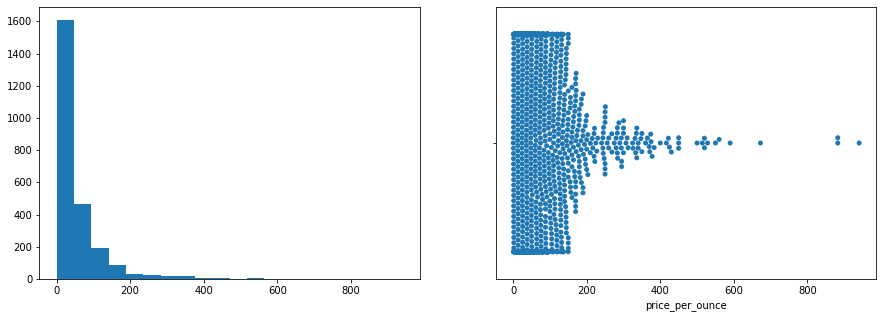

In [138]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].hist(products['price_per_ounce'], bins = 20)
sns.swarmplot(products['price_per_ounce'], ax = ax[1]);

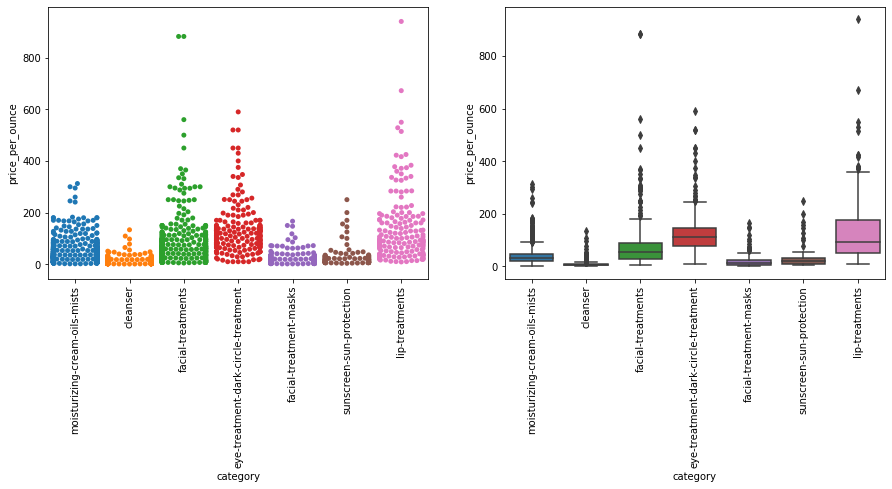

In [139]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sns.swarmplot(x="category", y="price_per_ounce", data=products, ax = ax[0])
#plt.xticks(rotation = 90);
sns.boxplot(x='category', y = 'price_per_ounce', data = products, ax = ax[1])

#https://stackoverflow.com/questions/31186019/rotate-tick-labels-in-subplot-pyplot-matplotlib-gridspec/52461208
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)

for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)

[]

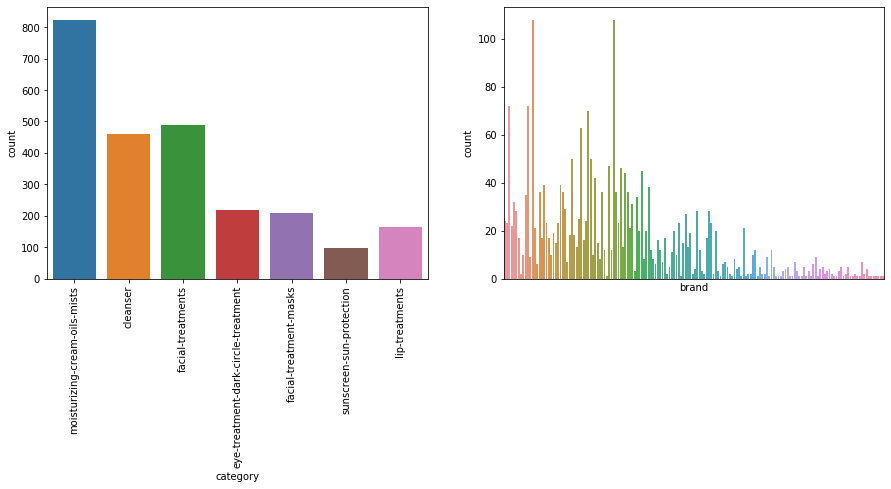

In [140]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sns.countplot(products['category'], ax = ax[0])
#plt.xticks(rotation = 90);
sns.countplot(products['brand'], ax = ax[1])

#https://stackoverflow.com/questions/31186019/rotate-tick-labels-in-subplot-pyplot-matplotlib-gridspec/52461208
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)

# for tick in ax[1].get_xticklabels():
#     tick.set_rotation(90)
ax[1].set_xticks([])    

In [141]:
train_cat = products[['brand', 'category']]

pvalues_fin = pd.DataFrame(columns = ['features', 'pvalue'])


pvalues_fin['features'] = train_cat.columns

pvals=[]
for col in train_cat.columns:
    
    samples = list([])
    for cat in products[col].unique():
        s = list(products[products[col] == cat]['price_per_ounce'])
        samples.append(s)
    pval=stats.f_oneway(*samples)[1] 
    
    pvals.append(pval)
pvalues_fin['pvalue'] = pvals

#picking the lowest 20 pvalue scores to fit into our model
cat_model = pvalues_fin.sort_values(by='pvalue', ascending = True).iloc[:20]

In [142]:
pvalues_fin

,features,pvalue
0,brand,2.325256e-104
1,category,5.141959e-170


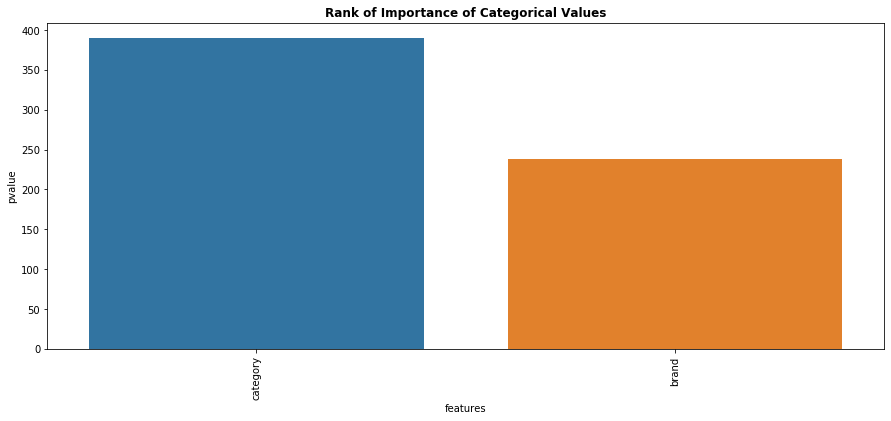

In [143]:
pvalues_fin['pvalue'] = np.log(1/pvalues_fin['pvalue'])

fig, ax = plt.subplots(figsize = (15,6))
sns.barplot(data=pvalues_fin.sort_values(by='pvalue', ascending=False), x = 'features', y='pvalue', ax=ax) 
plt.xticks(rotation=90)
plt.title('Rank of Importance of Categorical Values', weight = 'bold');

## GroupBy

In [144]:
products.groupby(['category']).mean()

,price,no_reviews,hearts,size1,size2,final_size,price_per_ounce
category,,,,,,,
cleanser,32.270783,343.089130,14579.632609,3.153957,1.151022,4.926095,9.084081
eye-treatment-dark-circle-treatment,64.324110,224.333333,12641.442922,0.423670,0.015982,0.518162,127.684457
facial-treatment-masks,42.569327,256.836538,15786.552885,1.364231,0.287885,2.437163,21.031755
facial-treatments,75.148463,277.395492,16821.553279,0.917147,0.214631,1.312990,73.340637
lip-treatments,25.414634,431.237805,24093.890244,0.217421,0.001280,0.265518,139.719556
moisturizing-cream-oils-mists,62.907209,307.231796,15672.455097,1.494268,0.479113,2.062928,40.357758
sunscreen-sun-protection,43.036458,231.583333,11789.833333,1.984062,0.673750,2.773370,30.679014


In [145]:
products[(products['price_per_ounce'] >= 200)].groupby(['brand', 'category']).mean()

price  \
brand              category                                          
AMOREPACIFIC       eye-treatment-dark-circle-treatment  260.000000   
                   facial-treatments                    265.000000   
                   moisturizing-cream-oils-mists        150.000000   
Armani Beauty      lip-treatments                        34.000000   
BeautyBio          facial-treatments                    128.333333   
...                                                            ...   
Yves Saint Laurent lip-treatments                        39.000000   
lilah b.           lip-treatments                        35.000000   
philosophy         lip-treatments                        23.000000   
tarte              moisturizing-cream-oils-mists         25.000000   
trèStiQue          lip-treatments                        25.000000   

                                                        no_reviews  \
brand              category                                          
AMOREPACIFIC       eye-treatment-dark-circle-treatment        13.0   
                   facial-treatments                          38.5   
                   moisturizing-cream-oils-mists               7.0   
Armani Beauty      lip-treatments                             31.0   
BeautyBio          facial-treatments                          10.0   
...                                                            ...   
Yves Saint Laurent lip-treatments                            212.0   
lilah b.           lip-treatments                             11.5   
philosophy         lip-treatments                             22.0   
tarte              moisturizing-cream-oils-mists             595.0   
trèStiQue          lip-treatments                             55.0   

                                                              hearts  size1  \
brand              category                                                   
AMOREPACIFIC       eye-treatment-dark-circle-treatment   2505.000000  0.500   
                   facial-treatments                     1235.000000  0.750   
                   moisturizing-cream-oils-mists          991.000000  0.500   
Armani Beauty      lip-treatments                        3284.000000  0.100   
BeautyBio          facial-treatments                     1230.333333  0.170   
...                                                              ...    ...   
Yves Saint Laurent lip-treatments                       17004.000000  0.120   
lilah b.           lip-treatments                        2570.500000  0.095   
philosophy         lip-treatments                        2635.000000  0.060   
tarte              moisturizing-cream-oils-mists        23894.000000  0.080   
trèStiQue          lip-treatments                        7184.000000  0.060   

                                                        size2  final_size  \
brand              category                                                 
AMOREPACIFIC       eye-treatment-dark-circle-treatment    0.0       0.500   
                   facial-treatments                      0.0       0.750   
                   moisturizing-cream-oils-mists          0.0       0.500   
Armani Beauty      lip-treatments                         0.0       0.100   
BeautyBio          facial-treatments                      0.0       0.170   
...                                                       ...         ...   
Yves Saint Laurent lip-treatments                         0.0       0.120   
lilah b.           lip-treatments                         0.0       0.095   
philosophy         lip-treatments                         0.0       0.060   
tarte              moisturizing-cream-oils-mists          0.0       0.080   
trèStiQue          lip-treatments                         0.0       0.060   

                                                        price_per_ounce  
brand              category                                              
AMOREPACIFIC       eye-treatment-dark-circle-treatment       

In [146]:
#looking in to some high priced moisturizers and facial treatments
#index 222 = Colored Clay CC Undereye Corrector, tarte
#index 2206 = Invincible Setting Powder SPF 45, Supergoop
products.drop([222, 2206], inplace = True)

In [147]:
#while looking closer at the expensive products I noticed that this Boosted Contouring Serum from Tata Harper
#the ingredience are not loaded properly
products[products.name == "Boosted Contouring Serum"]

,name,brand,category,price,ingredients,no_reviews,hearts,size1,size2,url,final_size,price_per_ounce
819,Boosted Contouring Serum,Tata Harper,moisturizing-cream-oils-mists,295.0,WaterGlycerinMontmorilloniteDimethiconeCyclohe...,1,285,1.0,0.0,https://www.sephora.com/product/boosted-contou...,1.0,295.0


In [148]:
#they didn't post their entire ingredients list properly on sephora, so I went to their own site and grabbed the list from there
products[products.name == "Boosted Contouring Serum"]['ingredients']

819    WaterGlycerinMontmorilloniteDimethiconeCyclohe...
Name: ingredients, dtype: object

In [149]:
products.loc[819, 'ingredients'] = "Hordeum Vulgare Leaf Juice, Glycerin, Capric Triglyceride, Rosa Damascena Flower Water, Propanediol, Cocos Nucifera Fruit Extract, Silybum Marianum Ethyl Ester, Arachidyl Alcohol, Glyceryl Stearate SE, Helianthus Annuus Seed Wax, Cetearyl Olivate, Cetyl Alcohol, Dipalmitoyl Hydroxyproline, Glyceryl Undecylenate, Algae Extract, Narcissus Tazetta Bulb Extract, Hyaluronic Acid, Citrus Aurantium Dulcis Flower Extract, Punica Granatum Extract, Carthamus Tinctorius Oleosomes, Leontopodium Alpinum Callus Culture Extract, Sambucus Nigra Fruit Extract, Calcium Ketogluconate, Phoenix Dactylifera Seed Extract, Sodium Hyaluronate, Voandzeia Subterranea Seed Extract, Pistacia Lentiscus Gum, Centella Asiatica Extract, Algae Oligosaccharides, Alaria Esculenta Extract, Menyanthes Trifoliata Leaf Extract, Rosmarinyl Glucoside, Lavandula Stoechas Extract, Caffeyl Glucoside, Gallyl Glucoside, Sorbitan Olivate, Ribose, Rosa Rubiginosa Seed Oil, Saccharide Isomerate, Arachidyl Glucoside, Salix Alba Bark Extract, Glyceryl Caprylate, Helianthus Annuus Seed Oil, Opuntia Ficus Indica, Santalum Spicatum Seed Oil, Camellia Oleifera Seed Oil, Camellia Sinensis Seed Oil, Euterpe Oleracea Fruit Oil, Plukenetia Volubilis Seed Oil, Arnica Montana Extract, Borago Officinalis Leaf Extract, Calendula Officinalis Flower Extract, Medicago Sativa Extract, Spiraea Ulmaria Extract, Tocopherol, Olea Europaea Oil, Aroma, Behenyl Alcohol, Maltodextrin, Xanthan Gum, p-Anisic Acid, Acacia Senegal Gum, Radish Root Ferment Filtrate, Citric Acid, Sodium Citrate, Benzyl Alcohol, Benzyl Benzoate, Citral, Citronellol, Eugenol, Geraniol, Limonene, Linalool"



## Unique Ingredients

In [150]:
all_ingredients = []

for i in products.index:
    list_ingredients = products.ingredients[i].split(', ')
    for j in list_ingredients:     
        all_ingredients.append(j.strip())
print(len(all_ingredients))
print(len(set(all_ingredients)))

unique_ingredients = set(all_ingredients)

68623
4887


In [166]:
sorted(unique_ingredients)[4500:4900]

['Tremella Fuciformis',
 'Tremella Fuciformis Extract',
 'Tremella Fuciformis Polysaccharide',
 'Tremella Fuciformis Sporocarp Extract',
 'Tri Hydrogenated Trilinoleate',
 'TriBehenin',
 'Triacetin',
 'Triacontanyl PVP',
 'Triacontanyl Pvp',
 'Triarachidin',
 'Tribehenin',
 'Tribehenin PEG20 Esters',
 'Tribehenin Peg20 Esters',
 'Tributyl Citrate',
 'Tricalcium Phosphate',
 'Tricaprylin',
 'Tricaprylyl Citrate',
 'Tricholoma Matsutake Extract',
 'Triclosan',
 'Tridecane',
 'Trideceth10',
 'Trideceth12',
 'Trideceth6',
 'Trideceth6 Phosphate',
 'Trideceth9',
 'Tridecyl Neopentanoate',
 'Tridecyl Salicylate',
 'Tridecyl Stearate',
 'Tridecyl Trimellitate',
 'Triemthylsiloxysilicate',
 'Triethanolamine',
 'TriethanolamineChlorphenesin',
 'Triethanolmaine',
 'Triethoxycaprylylsilane',
 'Triethoxycaprylysilane',
 'Triethoxysilylethyl',
 'Triethoxysilylethyl Polydimethylsiloxyethyl Hexyl Dimethicone',
 'Triethyl Citrate',
 'Triethylhexanoin',
 'Triethylhexyl Trimellitate',
 'Trifluoroacetyl 

In [152]:
products[products.ingredients == 'WaterGlycerinMontmorilloniteDimethiconeCyclohexasiloxaneGlyceryl Stearate SePolyglyceryl3 Methylglucose DistearateStearyl AlcoholPentylene GlycolPropylene GlycolMethylparabenChlorphenesinXanthan GumCarbomeSodium HydroxideSodium PcaButylparabenDipropylene GlycolTetrasodium EdtaLaminaria Saccharina ExtractMentholAloe Barbadensis Leaf JuiceBoswellia Serrata ExtractCamphorHamamelis Virginiana Leaf ExtractPoterium Officinale Root ExtractZingiber Officinale Root ExtractCinnamomum Cassia Bark ExtractBlue 1']

,name,brand,category,price,ingredients,no_reviews,hearts,size1,size2,url,final_size,price_per_ounce
818,Blue Herbal Moisturizer,Kiehl's Since 1851,moisturizing-cream-oils-mists,25.0,WaterGlycerinMontmorilloniteDimethiconeCyclohe...,20,1006,3.4,0.0,https://www.sephora.com/product/blue-herbal-mo...,3.4,7.352941


In [153]:
products[products.ingredients == 'WaterGlycerinCyclohexasiloxaneCetearyl EthylhexanoateAlcohol DenatAmmonium Polyacryloyldimethyl TaurateCi 14700']

,name,brand,category,price,ingredients,no_reviews,hearts,size1,size2,url,final_size,price_per_ounce
224,Hydra Zen Anti-Stress Gel Moisturizer,Lancôme,moisturizing-cream-oils-mists,48.0,WaterGlycerinCyclohexasiloxaneCetearyl Ethylhe...,1000,5665,1.7,0.0,https://www.sephora.com/product/hydra-zen-anti...,1.7,28.235294


In [154]:
products[products.ingredients == 'WaterAlcohol DenatGlycerinPropanediolSilicaPhenoxyethanolZinc OxideMethyl Methacrylate CrosspolymerKaolinZinc GluconateAloe Barbadensis Leaf JuiceOat Kernel FlourMenthoxypropanediolWitch Hazel Leaf WaterAllantoinSalicylic Acid']

,name,brand,category,price,ingredients,no_reviews,hearts,size1,size2,url,final_size,price_per_ounce
1213,Rare Earth Pore Refining Tonic,Kiehl's Since 1851,cleanser,21.0,WaterAlcohol DenatGlycerinPropanediolSilicaPhe...,21,3461,8.4,0.0,https://www.sephora.com/product/rare-earth-por...,8.4,2.500000
1214,Hydrating Face Tonic Toner,Bobbi Brown,cleanser,36.0,WaterAlcohol DenatGlycerinPropanediolSilicaPhe...,42,3090,6.7,0.0,https://www.sephora.com/product/hydrating-face...,6.7,5.373134
1215,Moor Cream Cleanser,Omorovicza,cleanser,80.0,WaterAlcohol DenatGlycerinPropanediolSilicaPhe...,10,1635,5.1,0.0,https://www.sephora.com/product/moor-cream-cle...,5.1,15.686275


In [155]:
products.loc[818, 'ingredients'] = 'Glycerin, Montmorillonite, Dimethicone, Cyclohexasiloxane, Glyceryl Stearate Se, Polyglyceryl-3 Methylglucose Distearate, Stearyl Alcohol, Pentylene Glycol, Propylene Glycol, Methylparaben, Chlorphenesin, Xanthan Gum, Carbomer Sodium Hydroxide, Sodium Pca, Butylparaben, Dipropylene Glycol, Tetrasodium Edta, Laminaria Saccharina Extract, Menthol, Aloe Barbadensis Leaf Juice, Boswellia Serrata Extract, Camphor, Hamamelis Virginiana Leaf Extract, Poterium Officinale Root Extract, Zingiber Officinale Root Extract, Cinnamomum Cassia Bark Extract, Blue 1'
products.loc[224, 'ingredients'] = "Glycerin, Cyclohexasiloxane, Cetearyl Ethylhexanoate, Alcohol Denat, Ammonium Polyacryloyldimethyl Taurate, Ci 14700, T-Butyl Alcohol, Madecassoside, Phenoxyethanol, Paeonia Suffruticosa Root Extract, Eugenol, Triethanolamine, Chlorphenesin, Salicylic Acid, Dimethicone, Dimethiconol, Limonene, Xanthan Gum, Benzyl Alcohol, Isopropyl Myristate, Propylene Glycol, Alpha-Isomethyl Ionone, Sorbitol, Moringa Pterygosperma Seed Extract, Disodium Edta, Rosa Gallica Flower Extract, Disodium Phosphate, Butylene Glycol, Butylphenyl Methylpropional, Citric Acid, Fragrance"
products.loc[1213, 'ingredients'] = "Alcohol Denat, Glycerin, Propanediol, Silica, Phenoxyethanol, Zinc Oxide, Methyl Methacrylate Crosspolymer, Kaolin, Zinc Gluconate, Aloe Barbadensis Leaf Juice, Oat Kernel Flour, Menthoxypropanediol, Witch Hazel Leaf Water, Allantoin, Salicylic Acid"
products.loc[1214, 'ingredients'] ='Hexylene Glycol, Butylene Glycol, Glycerin, Propanediol, Polysorbate 20, Camellia Sinensis Leaf Extract, Cucumis Sativus Fruit Extract, Chamomilla Recutita Extract, Aesculus Hippocastanum Bark Extract, Glycyrrhiza Glabra Root Extract, Codium Tomentosum Extract, Lavandula Angustifolia, Citrus Aurantium Dulcis, Pantethine, Hydrolyzed Wheat Protein, Hydrolyzed Corn Protein, Cymbopogon Martini, Hydrolyzed Soy Protein, Cholesterol, Trehalose, Aloe Barbadensis Leaf Juice, Sodium Hyaluronate, Linoleic Acid, Acrylates Copolymer, Phytantriol, Phytosphingosine, Glycine, Hydroxyproline, Proline, Carbomer, Linalool, Geraniol, Limonene, Disodium Edta, Pentaerythrityl Tetra-Di-T-Butyl Hydroxyhydrocinnamate, Phenoxyethanol'
products.loc[1215, 'ingredients'] = 'Hungarian Moor Mud, Zinc Oxide, Lavender Camphor, Peppermint, Eucalyptus Essential Oils'


,0,1
2087,Ci 16035,1
1575,Ci 17200,10
998,Ci 19140,29
129,Ci 42090,23
3496,Ci 42090Blue 1 Lake,2
2799,Ci 45380,1
3712,Ci 45410,2
968,Ci 60730,3
855,Ci 61565,1
4270,Ci 61570,2


In [156]:
products.to_csv("./data/products_clean_eda.csv", index = False)